#Tarea metodos computacionales

Fecha de entrega: Viernes 18 de Octubre







# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









### Punto 1:
Importemos las librerias necesarias para todo el código y definamos dos funciones para la posición de X y Y de la partícula en un tiempo determinado:

In [270]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
def pos_x(t, theta, alpha, v0, b, u,g):
    x=(u*np.cos(alpha))*(t)+(1/b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))
    return x
def pos_y(t, theta, alpha, v0, b, u,g):
    y=(1/b)*(g/b+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))-(g/b-u*np.sin(alpha))*(t)
    return y

Definimos los parámetros iniciales dados

In [271]:
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2
pos_x(7,theta, alpha, v0, b, u,g)

217.76761135883322

Creamos un dataframe que nos de las coordenadas X y Y para un T

In [272]:
from scipy import optimize
A=np.linspace(0,8.5,100)
B=pos_x(A,theta,alpha,v0,b,u,g)
C=pos_y(A,theta,alpha,v0,b,u,g)

d={"X":B,"Y":C,"Tiempo":A}
df=pd.DataFrame.from_dict(d)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,3.629343,3.598794,0.085859
2,7.232105,7.110084,0.171717
3,10.808399,10.534245,0.257576
4,14.358340,13.871649,0.343434
...,...,...,...
95,240.425132,-1.673783,8.156566
96,241.976343,-4.916158,8.242424
97,243.509876,-8.216732,8.328283
98,245.025806,-11.575255,8.414141


Graficamos tres figuras, una de X vs T, otra Y vs T y por último X vs Y que representa la trayectoria

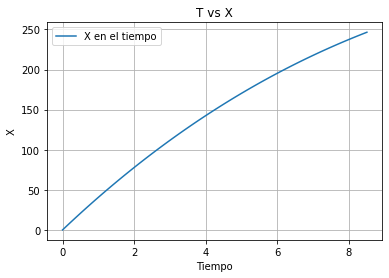

In [294]:
import pylab as plt

plt.plot(df.Tiempo,df.X,label="X en el tiempo")
plt.title("T vs X")
plt.xlabel("Tiempo")
plt.ylabel("X")
plt.grid()
plt.legend()
plt.show()

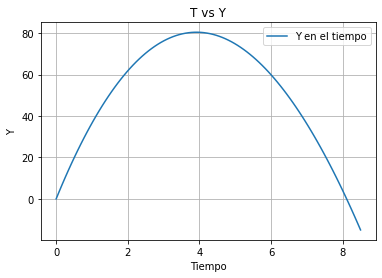

In [296]:
plt.plot(df.Tiempo,df.Y,label="Y en el tiempo")
plt.title("T vs Y")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

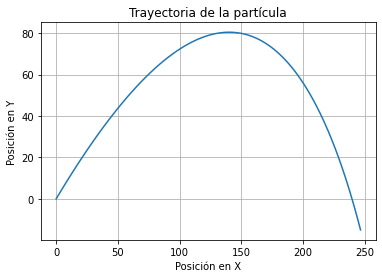

In [297]:
plt.plot(df["X"],df["Y"])
plt.title("Trayectoria de la partícula")
plt.grid()
plt.xlabel("Posición en X")
plt.ylabel("Posición en Y")
plt.show()

Vemos que y=0 al rededor de el intervalo de tiempo 8,9. Vamos a usar spicy para hallar el valor del tiempo para el que y=0 y esto nos dará el alcance de la partícula

In [299]:
z=sp.optimize.bisect(lambda t: pos_y(t,theta, alpha, v0, b, u,g),1,10)
print(z)

8.111627022095604


Vemos que en efecto el tiempo estaba entre 8 y 9. Ahora, con este tiempo podemos hallar dónde cayó la partícula, (el alcance)

In [300]:
pos_x(z,theta,alpha,v0,b,u,g)

239.60614945520763

Ahora construyamos una función que nos de el valor del tiempo para el que y=0 dependiendo de el theta ingresado:

In [301]:
k=lambda theta: sp.optimize.bisect(lambda t: pos_y(t,theta, alpha, v0, b, u,g),1,20)

Ahora con esta función, tenemos facilidad para graficar las trayectorias de diferentes partículas lanzadas en diferentes ángulos

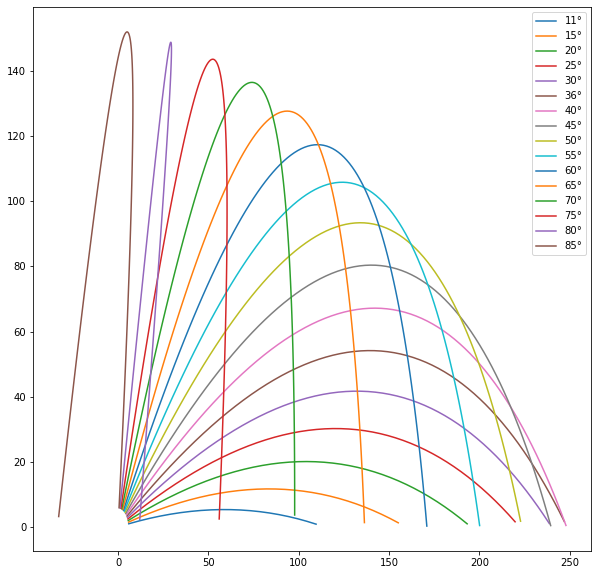

In [308]:
ti=np.deg2rad(10)
tf=np.deg2rad(90)
p=np.deg2rad(5)
plt.figure(figsize=(10,10))
for i in np.arange(ti,tf,p):
    st=str(int(np.rad2deg(i))+1)+"°"
    B=pos_x(np.arange(0.1,k(i),0.1),i,alpha,v0,b,u,g)
    C=pos_y(np.arange(0.1,k(i),0.1),i,alpha,v0,b,u,g)
    
    plt.plot(B,C,label=st)
plt.legend()

Ahora construyamos una función que nos interpole el alcance máximo de varios datos dependiendo del theta.

Vamos a usar los mismos theta usados en la gráfica anterior

In [314]:
z=np.arange(ti,tf,p)
c3=[]      #Creamos una lista vacía
for i in range(len(z)): 
    #print(k(z[i]))
    c3.append(k(z[i]))  #Añadimos los tiempos para cada theta donde y=0

c2=[]                #Creamos otra lista donde irán los valores del alcance máximo según theta
for i in np.arange(0,len(z)):
    nm=pos_x(c3[i],z[i],alpha,v0,b,u,g)
    c2.append(nm)  

Ahora con las listas llamadas "z" y "c2", podemos interpolar una función que nos de el alcance máximo de una partícula lanzada con un ángulo en radianes desde 10° hasta 85°

In [317]:
from scipy import interpolate
fi=sp.interpolate.CubicSpline(z,c2)

Veamos una gráfica de cómo se comporta el alcance máximo R dependiendo de theta:

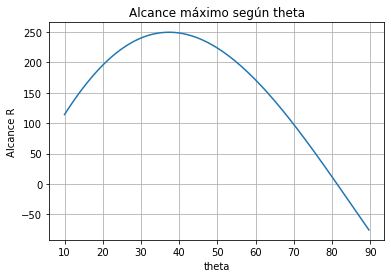

In [324]:
m3=np.arange(ti,tf,0.01)
plt.plot(np.rad2deg(m3),fi(m3),"-")
plt.title("Alcance máximo según theta")
plt.xlabel("theta")
plt.ylabel("Alcance R")
plt.grid()
plt.show()

Vemos que tiene sentido nuestra gráfica, pues cuando se lanza muy inclinado hacia arriba, el viento la empuja y obtiene valores negativos de posición, o sea que se devuelve.




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

### Solución:
Definamos la función y tomemos los puntos [4,8,12,16,20]

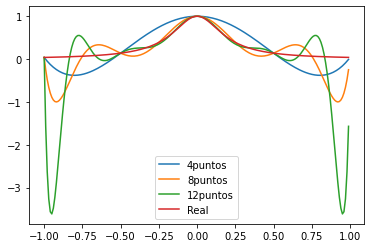

In [344]:
f=lambda x: 1/(1+(25*(x**2)))
ns=[4,8,12]
z1=np.arange(-1,1,0.01)
for i in ns:
    k=np.linspace(-1,1,i+1)
    z=f(k)
    f1=sp.interpolate.lagrange(k,z)
    lab=str(i)+"puntos"
    plt.plot(z1,f1(z1),label=lab)
plt.plot(z1,f(z1),label="Real")
plt.legend()    

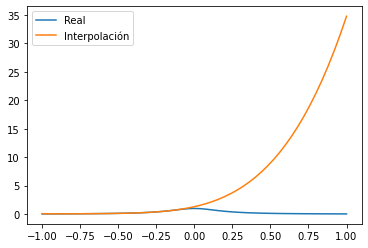

In [337]:
plt.plot(i,f(i),label="Real")
plt.plot(i,f1(i),label="Interpolación")
plt.legend()
plt.show()

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


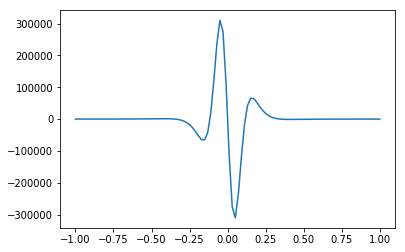

In [ ]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.